### Buscar si hay algún gen que sea muy específico de Dysgraphia (que solo sea del HPO dysgraphia o de muy pocos además)

In [1]:
import pandas as pd
import stringdb
import requests
import shutil
from IPython.display import Image

#### Lectura df

In [2]:
df = pd.read_csv("red_fenotipos_genes_dysgraphia.txt", sep="\t")
df.head()

,ncbi_gene_id,gene_symbol,hpo_id,hpo_name,frequency,disease_id
0,10,NAT2,HP:0000007,Autosomal recessive inheritance,-,OMIM:243400
1,10,NAT2,HP:0001939,Abnormality of metabolism/homeostasis,-,OMIM:243400
2,16,AARS1,HP:0002460,Distal muscle weakness,15/15,OMIM:613287
3,16,AARS1,HP:0002451,Limb dystonia,3/3,OMIM:616339
4,16,AARS1,HP:0008619,Bilateral sensorineural hearing impairment,HP:0040283,ORPHA:33364


#### Búsqueda de algún gen único de Dysgraphia

In [3]:
# Obtener los gene_symbol que tienen un hpo de Dysgraphia
dys_gene_symbols = df[df['hpo_name']=='Dysgraphia']['gene_symbol'].tolist()

# Contar las ocurrencias de cada gene_symbol distinto
value_counts = df['gene_symbol'].value_counts()

# Obtener los gene_symbol que aparecen una sola vez en todo el dataframe
unique_values_once = value_counts[value_counts == 1].index.tolist()

# Obtener los genes que solo aparecen una vez con un hpo de Dysgraphia
set(dys_gene_symbols).intersection(set(unique_values_once))

set()

#### Como no hay ninguno, buscamos el gene_symbol de dysgraphia que menos aparezca en otros HPO

In [14]:
# Obtener las filas de los genes que tienen mínimo un hpo de Dysgraphia
dysgraphia_genes_df = df[df['gene_symbol'].isin(dys_gene_symbols)]

# Contar las ocurrencias de esos genes en distintos HPOs
dysgraphia_genes_df['gene_symbol'].value_counts().sort_values(ascending=True)

gene_symbol
SORL1        26
TOMM40       26
ABCA7        37
SOX6         39
SPG21        45
FGF14        49
TMEM240      50
PMS1         53
PSEN2        60
MLH3         63
PMS2         64
FAN1         64
MSH6         83
MSH2         84
APP          85
EPCAM        94
SEMA4A       99
MLH1        102
RPS20       112
GRN         117
TMEM106B    120
CHMP2B      133
BMPR1A      145
SQSTM1      175
TREM2       182
LIMK1       187
RFC2        187
CLIP2       187
VPS37D      187
EIF4H       187
BAZ1B       187
BCL7B       187
GTF2IRD1    187
METTL27     187
TBL2        187
TMEM270     187
GTF2IRD2    187
BUD23       187
GTF2I       187
PSEN1       190
TGFBR2      195
FKBP6       197
DNAJC30     210
STX1A       221
NCF1        234
MLXIPL      294
MAPT        318
VCP         341
PIK3CA      419
ELN         421
KRAS        505
Name: count, dtype: int64

In [43]:
# Calculate value counts
value_counts = dysgraphia_genes_df['gene_symbol'].value_counts()

# Filter rows based on the condition (count less than 100)
filtered_rows = dysgraphia_genes_df[dysgraphia_genes_df['gene_symbol'].isin(value_counts[value_counts < 100].index)]

# Valores únicos
set(filtered_rows['gene_symbol'].to_list())

{'ABCA7',
 'APP',
 'EPCAM',
 'FAN1',
 'FGF14',
 'MLH3',
 'MSH2',
 'MSH6',
 'PMS1',
 'PMS2',
 'PSEN2',
 'SEMA4A',
 'SORL1',
 'SOX6',
 'SPG21',
 'TMEM240',
 'TOMM40'}

Requesting to https://string-db.org/api/image/network?identifiers=APP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dAPP%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dFGF14%0dMSH6%0dMSH6%0dMSH6%0dMSH6%0dMSH6

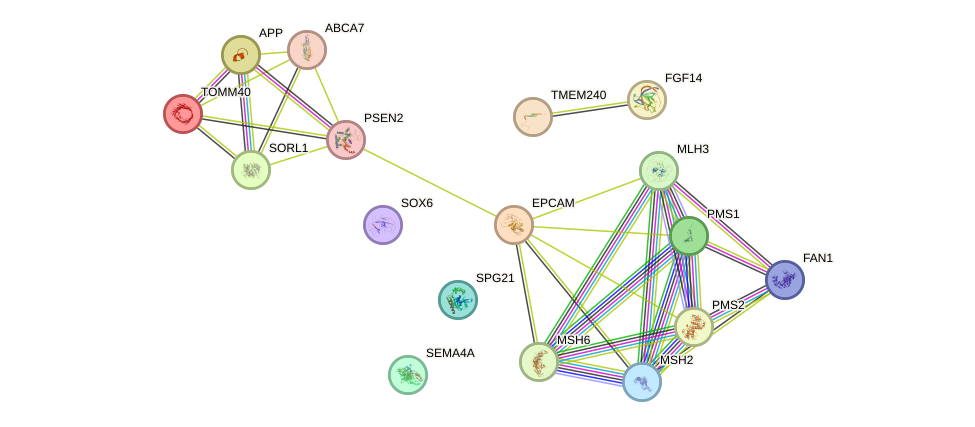

In [46]:
# Obtención de un grafo de aquellos genes que son más específicos (aparecen en menos HPOs)
genes = filtered_rows['gene_symbol'].tolist()

# obtener infomracion sobre los genes
string_ids = stringdb.get_string_ids(genes)
string_ids
str_genes = "%0d".join(genes)

base_url = "https://string-db.org/api/image/"
method = "network?"

url_request = base_url + method + "identifiers="+str_genes+"&species=9606&network_type=functional"
print("Requesting to "+url_request)


response = requests.get(url_request, stream=True)
with open('grafo_genes_que_menos_aparecen_en_otros_hpo.png', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

####-----------------------

# Obtención de un grafo de los 51 genes relacionados con nuestro HPO
genes = set(dysgraphia_genes_df['gene_symbol'])

# obtener infomracion sobre los genes
string_ids = stringdb.get_string_ids(genes)
str_genes = "%0d".join(genes)

base_url = "https://string-db.org/api/image/"
method = "network?"

url_request = base_url + method + "identifiers="+str_genes+"&species=9606&network_type=functional"
print("Requesting to "+url_request)


response = requests.get(url_request, stream=True)
with open('stringdb_51_genes.png', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

Image(filename='grafo_genes_que_menos_aparecen_en_otros_hpo.png')

### Vamos a buscar cuáles son los fenotipos cuyos genes están más relacionados con Disgrafia

Número de genes relacionados con Dysgraphia

In [18]:
len(set(dysgraphia_genes_df['gene_symbol']))

51

HPOs relacionados con esos genes (además de dysgraphia)

In [39]:
dysgraphia_genes_df['hpo_name'].value_counts().nlargest(10)
# Aparecen más de 51 porque algunos genes se repiten con su fenotipo al estar en diferentes enfermedades

hpo_name
Dysgraphia                               67
Autosomal dominant inheritance           62
Depression                               55
Dysarthria                               54
Gait disturbance                         53
Anxiety                                  50
Memory impairment                        50
Abnormality of speech or vocalization    47
Intellectual disability                  46
Hypotonia                                44
Name: count, dtype: int64